## Домашняя работа №1
Морозов Анатолий 3822Б1ПМоп2
### Описание задачи
Задача классификации. Набор данных о бронировании отелей.
По данным датасета нужно предсказать, подтвердит ли клиент бронировние номера в отеле или отменит его.

In [264]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Чтение данных

In [265]:
data = pd.read_csv("https://raw.githubusercontent.com/mortolik/ML/refs/heads/main/Hotel%20Reservations.csv")

### Вывод данных

In [266]:
data.shape

(36275, 19)

In [267]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [268]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [269]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [270]:
print(data.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Описание столбцов:

- Booking_ID: уникальный идентификатор бронирования

- no_of_adults: число взрослых постояльцев

- no_of_children: число детей

- no_of_weekend_nights: количество ночей проживания, приходящихся на выходные дни (субботу и воскресенье)

- no_of_week_nights: количество ночей проживания в будние дни (с понедельника по пятницу)

- type_of_meal_plan: выбранный тип питания

- required_car_parking_space: наличие запроса на парковочное место (0 — нет, 1 — да)

- room_type_reserved: тип забронированного номера (закодированное значение)

- lead_time: срок между бронированием и датой заезда в днях

- arrival_year: год заезда

- arrival_month: месяц заезда

- arrival_date: число месяца заезда

- market_segment_type: сегмент рынка, к которому отнесено бронирование

- repeated_guest: является ли гость постоянным (0 — нет, 1 — да)

- no_of_previous_cancellations: количество ранее отмененных клиентом бронирований

- no_of_previous_bookings_not_canceled: количество ранее выполненных бронирований клиента

- avg_price_per_room: средняя стоимость номера за ночь в евро

- no_of_special_requests: количество особых пожеланий от клиента

- booking_status: статус бронирования (отменено или подтверждено)

In [272]:
data = data.drop(labels = "Booking_ID", axis = 1)

In [273]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Обработка пропущенных значений

In [274]:
data.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


data.isnull().sum() проверяет наличие пропущенных значений. Метод выводит количество пропущенных значений для каждого столбца. Видно, что все значения равны 0 - пропущенных значений нет.

### Визуализация данных

In [276]:
#Корреляционная матрица
corr = data.corr(numeric_only=True)
print(corr)

                                      no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.019787   
no_of_children                           -0.019787        1.000000   
no_of_weekend_nights                      0.103316        0.029478   
no_of_week_nights                         0.105622        0.024398   
required_car_parking_space                0.011429        0.034244   
lead_time                                 0.097287       -0.047091   
arrival_year                              0.076719        0.045983   
arrival_month                             0.021841       -0.003076   
arrival_date                              0.026338        0.025482   
repeated_guest                           -0.192277       -0.036348   
no_of_previous_cancellations             -0.047426       -0.016390   
no_of_previous_bookings_not_canceled     -0.119166       -0.021189   
avg_price_per_room                        0.296886        0.337728   
no_of_special_reques

<Axes: >

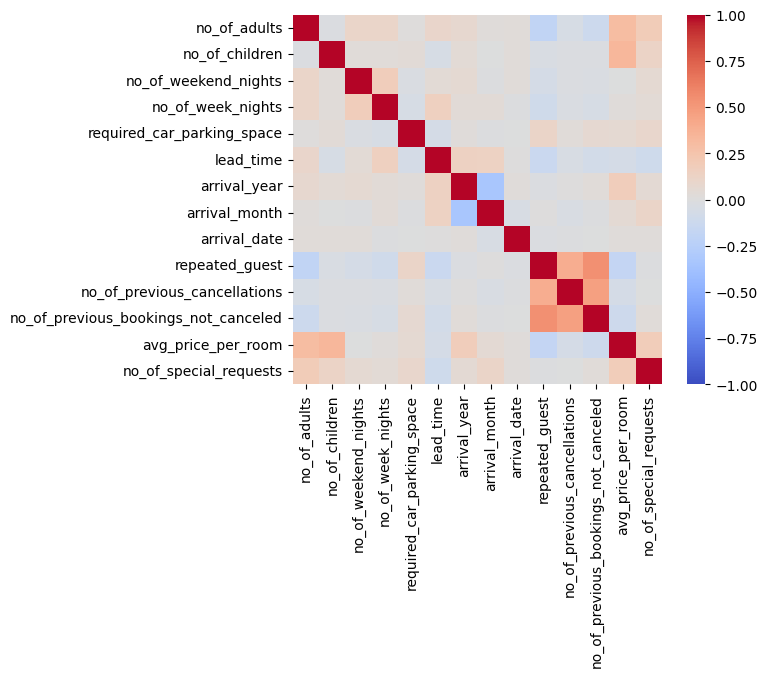

In [277]:
sns.heatmap(corr, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

In [278]:
data.corr(numeric_only=True)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


Почти все признаки независимы друг от друга (большинство значений в корелляционной матрице около нуля), представим это на графиках

Text(0.5, 1.0, 'no_of_adults vs lead_time')

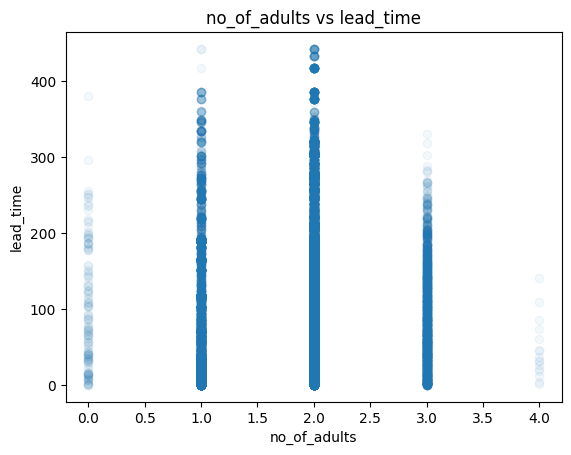

In [279]:
plt.plot(data['no_of_adults'], data['lead_time'], 'o', alpha = 0.05)
plt.xlabel('no_of_adults')
plt.ylabel('lead_time')
plt.title('no_of_adults vs lead_time')

Text(0.5, 1.0, 'no_of_adults vs avg_price_per_room')

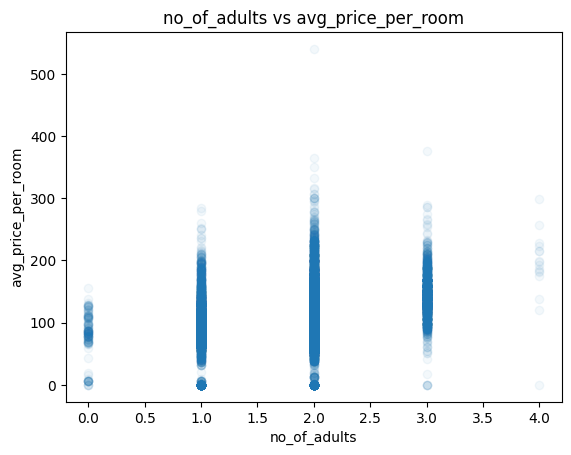

In [280]:
plt.plot(data['no_of_adults'], data['avg_price_per_room'], 'o', alpha = 0.05)
plt.xlabel('no_of_adults')
plt.ylabel('avg_price_per_room')
plt.title('no_of_adults vs avg_price_per_room')


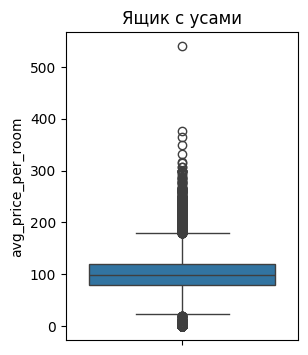

In [281]:
#Ящик с усами на примере одного из признаков
plt.figure(figsize=(3, 4))
sns.boxplot(y="avg_price_per_room", data = data)
plt.title('Ящик с усами')
plt.show()
pass

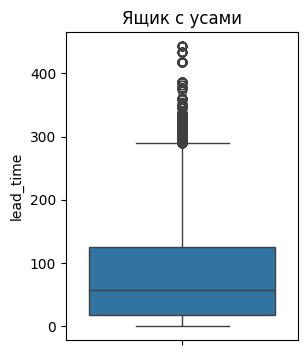

In [282]:
plt.figure(figsize=(3, 4))
sns.boxplot(y="lead_time", data = data)
plt.title('Ящик с усами')
plt.show()
pass

### Обработка категориальных признаков

In [283]:
#Разделим категориальные и числовые признаки
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [284]:
#Все уникальные значения для каждого категориального признака
for c in categorical_columns:
    print(f"{c}: {data[c].unique()}")

type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status: ['Not_Canceled' 'Canceled']


In [285]:
for category_col in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']:
    data[category_col] = data[category_col].astype('category')

In [286]:
data['type_of_meal_plan'].dtype

CategoricalDtype(categories=['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected'], ordered=False, categories_dtype=object)

In [287]:
data.describe(include=['category'])

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,27835,28130,23214,24390


In [288]:
#Обрабатываем первое значение
unique_values = data['type_of_meal_plan'].unique()
print(unique_values)

['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
Categories (4, object): ['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected']


In [289]:
 data['type_of_meal_plan'] = data['type_of_meal_plan'].map({'Meal Plan 1': 0, 'Not Selected': 1, 'Meal Plan 2':2, 'Meal Plan 3':3})

In [290]:
data['type_of_meal_plan']

,type_of_meal_plan
0,0
1,1
2,0
3,0
4,1
...,...
36270,0
36271,0
36272,0
36273,1


In [291]:
data.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,1,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


In [292]:
unique_values = data['room_type_reserved'].unique()
print(unique_values)

['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3']
Categories (7, object): ['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5',
                         'Room_Type 6', 'Room_Type 7']


In [293]:
data['room_type_reserved'] = data['room_type_reserved'].map({'Room_Type 1': 0, 'Room_Type 2': 1, 'Room_Type 3':2, 'Room_Type 4':3, 'Room_Type 5':4, 'Room_Type 6':5, 'Room_Type 7':6})

In [294]:
data['room_type_reserved']

,room_type_reserved
0,0
1,0
2,0
3,0
4,0
...,...
36270,3
36271,0
36272,0
36273,0


In [295]:
data.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,1,0,0,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


In [296]:
unique_values = data['market_segment_type'].unique()
print(unique_values)

['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
Categories (5, object): ['Aviation', 'Complementary', 'Corporate', 'Offline', 'Online']


In [297]:
data['market_segment_type'] = data['market_segment_type'].map({'Aviation': 0, 'Complementary': 1, 'Corporate':2, 'Offline':3, 'Online':4})

In [298]:
data['market_segment_type']

,market_segment_type
0,3
1,4
2,4
3,4
4,4
...,...
36270,4
36271,4
36272,4
36273,4


In [299]:
data.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,1,0,0,5,2018,11,6,4,0,0,0,106.68,1,Not_Canceled


In [300]:
unique_values = data['booking_status'].unique()
print(unique_values)

['Not_Canceled', 'Canceled']
Categories (2, object): ['Canceled', 'Not_Canceled']


In [301]:
data['booking_status'] = data['booking_status'].map({'Canceled': 0, 'Not_Canceled': 1})

In [302]:
data['booking_status']

,booking_status
0,1
1,1
2,0
3,0
4,0
...,...
36270,1
36271,0
36272,1
36273,0


In [303]:
data.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,1,0,0,5,2018,11,6,4,0,0,0,106.68,1,1


In [304]:
print(data.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0                 0                           0                  0        224   
1                 1                           0                  0          5   
2                 0                           0                  0          1   
3                 0                           0                  0        211   
4                 1                           0                  0         48   

   arrival_year  arrival_month  arrival_date market_segm

In [305]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,1,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,1,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,1,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


In [306]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<Axes: >

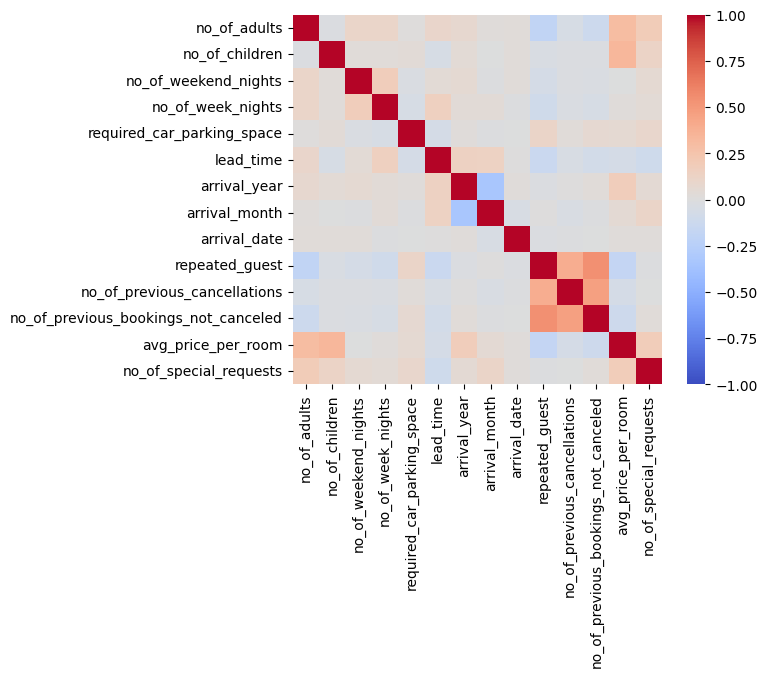

In [307]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

### Обучающая и тестовая выборки

In [308]:
#Целевой признак
X = data.drop (["booking_status"], axis=1)
y = data["booking_status"]

In [309]:
#Разделяем выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(27206, 9069)

### Классификация и вычисление ошибок

KNN.
Используем алгоритм K ближайших соседей

In [310]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

#k = 5
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: Train: {:.2f}%, Test: {:.2f}%".format(100 * accuracy_score(y_train, y_train_pred), 100 * accuracy_score(y_test, y_test_pred)))
print("MSE: Train: {}, Test: {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Accuracy score: Train: 86.58%, Test: 80.86%
MSE: Train: 0.13416158200396971, Test: 0.1914213253942


In [311]:
#k = 10
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: Train: {:.2f}%, Test: {:.2f}%".format(100 * accuracy_score(y_train, y_train_pred), 100 * accuracy_score(y_test, y_test_pred)))
print("MSE: Train: {}, Test: {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Accuracy score: Train: 83.39%, Test: 79.80%
MSE: Train: 0.1661398220980666, Test: 0.20200683647590695


In [312]:
#k = 15
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: Train: {:.2f}%, Test: {:.2f}%".format(100 * accuracy_score(y_train, y_train_pred), 100 * accuracy_score(y_test, y_test_pred)))
print("MSE: Train: {}, Test: {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Accuracy score: Train: 82.36%, Test: 80.42%
MSE: Train: 0.17635815628905388, Test: 0.1958319550115779


Наибольшую точность на обучающей и тестовой выборках показал KNN алгоритм при k = 15.

Проведем классификацию при помощи алгоритма Random forest.

In [313]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print("Accuracy score: Train: {:.2f}%, Test: {:.2f}%".format(100 * accuracy_score(y_train, y_train_pred), 100 * accuracy_score(y_test, y_test_pred)))
print("MSE: Train: {}, Test: {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Accuracy score: Train: 99.42%, Test: 90.77%
MSE: Train: 0.00580754245387047, Test: 0.09229242474363215


Алгоритм Random forest показывает себя гораздо лучше на выборках, чем KNN, в особенности на обучающей выборке.

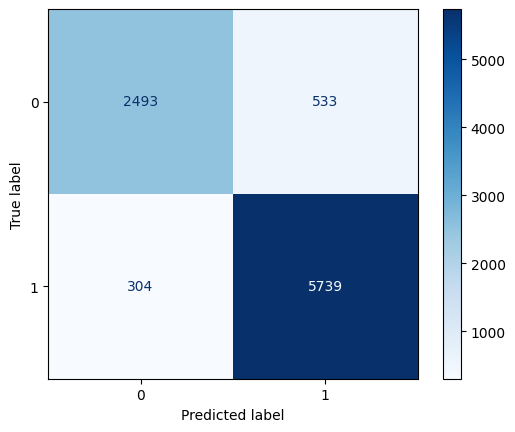

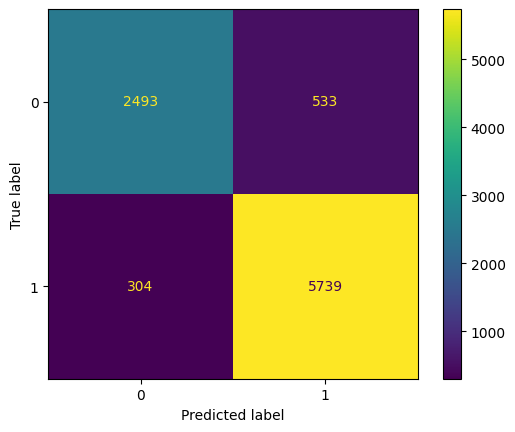

In [314]:
#Матрица ошибок
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap=plt.cm.Blues)
disp.plot()
pass

### Выводы

Полученные метрики качества модели k ближайших соседей находятся на приемлемом уровне. Наилучший результат достигается при значении гиперпараметра, равном 5 соседям. Разница в точности между выборками позволяет сделать вывод об отсутствии переобучения.

Общий вывод:
В рамках лабораторной работы был выполнен комплексный анализ данных: набор был загружен, обработан (включая устранение пропусков и работу с категориальными признаками), а также визуализирован. После этого была обучена модель машинного обучения для решения задачи классификации — прогнозирования того, отменит клиент бронирование отеля или подтвердит его. Весь процесс включал в себя обучение модели, оценку её ошибок и анализ результатов. В итоге была успешно создана рабочая прогнозирующая модель.